This Jupyter notebook is a property of the University of California and copyrighted by Dipak Ghosal. Only personal use for ECS 132 class is allowed. Uploading this to any shared site is a violation of the University of California copyright laws. 

This is Part 2

# Markov Chains 

## Analysis of the Old Faithful Dataset

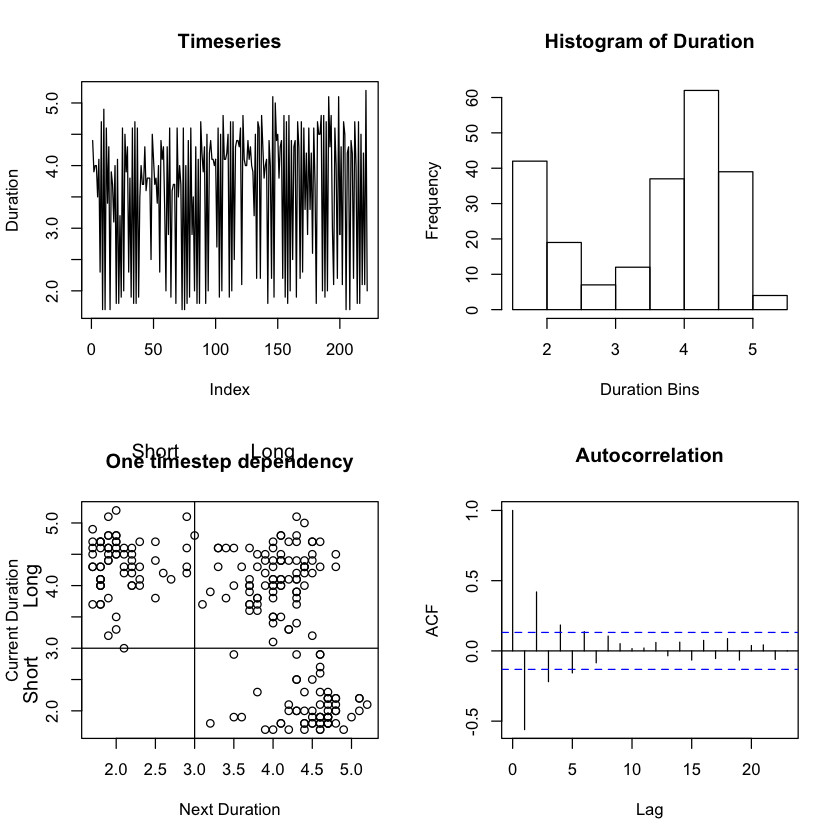

In [5]:
#setwd("~/Box Sync/Teaching/ECS132/R-code/")
data = read.table(file="./Data/Old_Faithful.txt", header=TRUE)

par(mfrow=c(2,2))

n = length(data[,1])

currentd = numeric(n-1)
nextd = numeric(n-1)

plot(data[,3], type = 'l', main="Timeseries", xlab="Index", ylab="Duration")

hist(data[,3], main="Histogram of Duration", ylab="Frequency", xlab="Duration Bins")

for (i in seq(0,n-1,1)) {
  currentd[i] = data[i,3]
  nextd[i] = data[i+1,3]
}

plot(nextd,currentd, main="One timestep dependency", ylab = "Current Duration", xlab = "Next Duration")
#text(2, 1, "short")
mtext(c("Short","Long"),side=3,line=2,at=c(2.5,4))
mtext(c("Short","Long"),side=2,line=2,at=c(2.5,4))
abline(v=3)
abline(h=3)


acf(data[,3], main="Autocorrelation")

## Stochastic Process 

A stochastic process is a collection of random variables indexed by time. $X_1 , X_2 \ldots$ are random variables and the subscripts $1, 2, \ldots$ are steps in time. Here, we will consider that time moves in discrete steps. Hence, we are considering  *discrete time* stochastic process. This is opposed to continuous time stochastic process in which time is continous and hence a real value.

The values assumed by the random variables $X_1 , X_2 \ldots$  are called **states** and  the set of all states is called the **state space**.

If $X_1 = i$ and $X_2 = j$ then we say that the (stochastic) process made a transition from state $i$ to state $j$ in one time step (i.e. timestep 1 to timestep 2). Typically, we are interested in the long-run behavior. That is after many transitions what are the probabilities of finding the process in different states.

### Introductory Example

On an island days can classified either as sunny (denoted by 0) or rainy (denoted by 1). Once either a rainy or sunny pattern has begun it tends to continue for a while. If one day is sunny, the probability that the next day is also sunny is 0.97. Similarly, if one day is rainy, the probability that the next day is rainy is 0.94.
The state space $S = \{0, 1\}$. Different $X_n$ where $n$ denotes index day are not independent random variables and we can write down the following conditional probabilities representing the one-(time)-step transition probabilities:

\begin{eqnarray*}
  \alpha &=& P(X_{n+1} = 1 \ | \ X_{n} = 0) \\
         &=& 0.03 \\
  1 - \alpha &=& P(X_{n+1} = 0 \ | \ X_{n} = 0) \\
             &=& 0.97 \\
  \beta &=& P(X_{n+1} = 0 \ | \ X_{n} = 1) \\
         &=& 0.06 \\
  1 - \beta &=& P(X_{n+1} = 1 \ | \ X_{n} = 1) \\
             &=& 0.94 \\
\end{eqnarray*}


The above are the one step transition probabilities. To find the long-run probabilities we need to find $P(X_n = i \ | \  X_{n-1} = i_{n-1}, X_{n-2} = i_{n-2}, \ldots , X_1 = i_1)$. This is not easy to find in general case with arbitrary dependence among the random variables.


## Markov Chains

We consider a limited dependence among the random variables.

A 2-state Markov Chain is a sequence of random variables $X_n,~n = 1, 2, \ldots$ that takes two values 0 and 1. The random variables are not independent but have restricted dependencies. In particular,

\begin{eqnarray*}
P(X_n = 1 \ | \ X_{n-1} = 0, X_{n-2} = i_{n-2}, \ldots , X_1 = i_1) &=& P(X_n = 1 \ | \ X_{n-1} = 0) \\
   &=& p_{01}
\end{eqnarray*}


This implies that that next state only depends on the current state. The past and the future are conditionally independent given the future.

Let's define some symbols:

\begin{eqnarray*}
  p_{00} &=& P(X_n = 0 | X_{n-1} = 0) \\
         &=& 1 - \alpha \\
  p_{01} &=& P(X_n = 1 | X_{n-1} = 0) \\
         &=& \alpha \\
  p_{10} &=& P(X_n = 0 | X_{n-1} = 1)  \\
         &=& \beta \\
  p_{11} &=& P(X_n = 1 | X_{n-1} = 1) \\
         &=& 1 - \beta
\end{eqnarray*}

Since we have states and transitions, and we are computer scientists, we should, at this point, have a nearly uncontrollable urge to write a state diagram as follows: 

![2state-diagram](Figures/2StateDiagram.jpg)


We can write this in the form of a matrix which is one-step transition probability matrix.

\begin{equation*}
  P =  \left[ \begin{array}{cc}
       1 - \alpha & \alpha \\
       \beta & 1 - \beta
       \end{array} \right].
\end{equation*}

Transition matrices allow us to simplify the process of writing out transition probabilties for stochastic processes. In particular, they have 2 important properties:  
1. For a stochastic process with $n$ states, the transition matrix will be an $n\times n$ matrix.  
2. Since $P(S)=1$, we must end up in some state. Therefore, each row of a valid transition matrix will sum to 1.


How do we go from 1-step probabilities to compute the probabilities in 2 steps. Suppose we want to find $p_{00}(2)$.

\begin{eqnarray*}
p_{00}(2) &=& \underbrace{P(X_n = 0 | X_{n-2} = 0)}_\text{we show for $n=3$ and $n-2 = 1$} \\
         &=& P(X_3 = 0 | X_1 = 0) \\
         &=& \frac{P(X_3 = 0 \cap X_1 = 0)}{P(X_1 = 0)} \\
         &=& \underbrace{\frac{[P(X_3 = 0 \cap  X_2 = 0 \cap  X_1 = 0) + P(X_3 = 0 \cap  X_2 = 1 \cap  X_1 = 0)]}{ P(X_1 = 0) }}_{\text{Use the multiplication rule}} \\
         &=& \frac{P( X_1 = 0) P( X_2 = 0|X_1 = 0) P( X_3 = 0|X_2 = 0 \cap X_1 = 0)}{P(X_1 = 0)} \\
         &+& \frac{P( X_1 = 0) P( X_2 = 1|X_1 = 0) P( X_3 = 0|X_2 = 1 \cap X_1 = 0)}{P(X_1 = 0)} \\
         &=& p_{00} p_{00} + p_{10} p_{01} \\\
         &=& (1 - \alpha)^2 + \alpha \beta
\end{eqnarray*}


Note that $P(X_3 = 0|X_2 = 0 \cap X_1 = 0)$ is $P(X_3 = 0|X_2 = 0)$ because of our assumption that next state only depends on the current state.

In general these follow the Chapman-Kolmogrov equation

\begin{equation}
p_{i,j}^{2} = \sum_{k \in S} p_{ik} p_{kj}
\end{equation}


\begin{eqnarray*}
  \mathbf{P}^2 &=& \left[ \begin{array}{cc}
       p_{00}p_{00} + p_{10} p_{01} & p_{00}p_{01} + p_{01} p_{11} \\
       p_{10}p_{00} + p_{11} p_{10} & p_{10}p_{01} + p_{11} p_{11}
       \end{array} \right] \\
               &=& \left[ \begin{array}{cc}
       p_{00} & p_{01}  \\
       p_{10} & p_{11}
       \end{array} \right] \left[ \begin{array}{cc}
       p_{00} & p_{01}  \\
       p_{10} & p_{11}
       \end{array} \right]  \\
               &=&
       \frac{1}{\alpha + \beta} \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right]
       + \frac{(1 - \alpha - \beta)^2}{\alpha + \beta}  \left[ \begin{array}{cc}
       \alpha & -\alpha \\
       -\beta & \beta
       \end{array} \right]
\end{eqnarray*}



As mentioned before, we are interested in the long-run distribution, i,e, $p_{i,j} (r)$ which is probability that the process transition from state $i$ to state $j$ in $r$ steps. However, before we begin, we must check that our Markov Chain is **ergodic**.  That is, all of its states are **recurrent** (at least for our purposes). A state is recurrent if it is possible to leave that state once it is entered. Otherwise it would be **absorbing**. 

Another way of checking ergodicity is to assert that all transition probabilities *between states* need to fall *between* 0 and 1, or, in the case of the given example, $0 < | 1-\alpha-\beta | < 1$.

We can show that


\begin{equation*}
  p_{i,j} (r) = \frac{1}{\alpha + \beta}
      \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right] ~+~ \frac{(1 - \alpha - \beta)^r}{\alpha + \beta}
       \left[ \begin{array}{cc}
       \alpha & -\alpha \\
       -\beta & \beta
       \end{array} \right]\\
\end{equation*}


If 
\begin{equation*}
0 < |1 - \alpha - \beta| < 1 
\end{equation*} 
$p_{i,j}(r)$ converges geometrically as $r \rightarrow \infty$ to

\begin{equation*}
  p_{i,j} (r) = \frac{1}{\alpha + \beta}
      \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right]
\end{equation*}


The long-run probability distribution $\Lambda = [ \lambda_0 , \lambda_1]$,

\begin{equation*}
  [ \lambda_0 , \lambda_1] = [ \frac{\beta}{\alpha + \beta}, \frac{\alpha}{\alpha + \beta}]
\end{equation*}

You can also think about it this way: $\lambda_0$ is the long-run probability that, regardless of what state you began in, you will end up in state 0. $\lambda_1$ is the same for state 1, and so on.

### Example 1

For a two state Markov Chain with a 1-step transition probability $\mathbf{P}$ given by

\begin{equation*}
  \mathbf{P} = \left[ \begin{array}{cc}
       1 - \alpha & \alpha \\
       \beta & 1 - \beta
       \end{array} \right]
\end{equation*}


we said that $\mathbf{P}^r$ is given by

\begin{equation*}
  \mathbf{P}^r = \frac{1}{\alpha + \beta} \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right]
       + \frac{(1 - \alpha - \beta)^r}{\alpha + \beta}  \left[ \begin{array}{cc}
       \alpha & -\alpha \\
       -\beta & \beta
       \end{array} \right]
\end{equation*}

Prove the equation  by mathematical induction as follows. As a initial step verify that the equation is correct for $r = 1$. Then do the induction step.  Assuming it is true for $\mathbf{P}^r$ show that it is true for $\mathbf{P}^{r+1}$.

### Solution

We first show that the above relation is true for $r = 1$.

\begin{eqnarray*}
  \mathbf{P}^1 &=& \frac{1}{\alpha + \beta} \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right]
       + \frac{(1 - \alpha - \beta)}{\alpha + \beta}  \left[ \begin{array}{cc}
       \alpha & -\alpha \\
       -\beta & \beta
       \end{array} \right] \\
      &=& \left[ \begin{array}{cc}
       1 - \alpha & \alpha \\
       \beta & 1 - \beta
       \end{array} \right] \\
      &=& \mathbf{P}
\end{eqnarray*}


Now we assume that it is true for $r$  and find $\mathbf{P}^{r+1}$.

\begin{eqnarray*}
  \mathbf{P}^{r+1} &=& \mathbf{P}^r \times \mathbf{P} \\
          &=& \left (\frac{1}{\alpha + \beta} \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right]
       + \frac{(1 - \alpha - \beta)^r}{\alpha + \beta}  \left[ \begin{array}{cc}
       \alpha & -\alpha \\
       -\beta & \beta
       \end{array} \right] \right ) \times  \left[ \begin{array}{cc}
       1 - \alpha & \alpha \\
       \beta & 1 - \beta
       \end{array} \right] \\
       &=& \text{After some algebra} \\
       &=& \frac{1}{\alpha + \beta} \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right]
       + \frac{(1 - \alpha - \beta)^{r+1}}{\alpha + \beta}  \left[ \begin{array}{cc}
       \alpha & -\alpha \\
       -\beta & \beta
       \end{array} \right]
\end{eqnarray*}



### Interpreting the Long-run Distribution

For a discrete time Markov Chain: after a large number of discrete time-steps what is the probability of finding the process in the different states. You can think of this as people travelling between destinations or quantities of sand or water. Eventually, this particular system will reach some kind of equilibrium, and that's precisely what we are after.


### Example 2 - Highway Exit 

To monitor the flow of traffic exiting a busy freeway into an industrial
area, the highway department has a TV camera aimed at traffic on a one-lane exit ramp. Each vehicle that passes in sequence can be classified as Light (for example, an automobile, van, or pickup truck) or Heavy (a heavy truck). Suppose data indicate that a Light vehicle is followed by another Light vehicle 70% of the time and that a Heavy vehicle is followed by a Heavy one 5% of the time.

We will denote a heavy vehicle by 1 and a light vehicle by 0. Let $X_n$ denote the stochastic process where $n$ is the discrete index variable (in this case the position of a vehicle). The state space $X = \{0,1\}$.  The one-step transition matrix is given by

\begin{eqnarray*}
  P &=&  \left[ \begin{array}{cc}
       1 - \alpha & \alpha \\
       \beta & 1 - \beta
       \end{array} \right]  \\
    &=&  \left[ \begin{array}{cc}
       0.70 & 0.30 \\
       0.95 & 0.05
       \end{array} \right]
\end{eqnarray*}


1. What assumptions are necessary for the Heavy-Light process to be a homogenous 2-state Markov Chain? Do these assumptions seem realistic? (One reason the process may not be independent is a traffic law that for- bids Heavy trucks from following one another within a certain distance on the freeway. The resulting tendency towards some sort of (spacing between Heavy trucks may carry over to exit ramps.)

We assume  that one-step transition probabilities are time homogeneous, i.e., they do not change with time. This assumption may not be very realistic considering the fact that the composition of the vehicles will change with time-of-day.


2. If we see a Heavy vehicle in the monitor now, what is the probability that the second vehicle after it will also be Heavy? The fourth vehicle after it?

Find $P^2$. The $i=1, j=1$ entry of $P^2$ gives the probability. For the second part, find $P^4$ and get the $i=1, j=1$ entry. We can easily do this in R. The following code was used to generate $P^2$ and $P^4$.


In [9]:
P = matrix(c(0.7,0.3,0.95,0.05), nrow=2, ncol=2, byrow=TRUE, dimnames=list(c(0,1), c(0,1)))
P
P2 = P%*%P
P2
P4 = P2%*%P2
P4

,0,1
0,0.70,0.30
1,0.95,0.05


,0,1
0,0.7750,0.2250
1,0.7125,0.2875


,0,1
0,0.7609375,0.2390625
1,0.7570312,0.2429687


In [ ]:
3. If we see a Light vehicle in the monitor now, what is the probability that the second vehicle after it will also be Light? The fourth vehicle after it?
  We can get the answers from P2 and P4 matrices shown above

4. In the long run, what proportion of the vehicles on this ramp do you suppose is Heavy?
  If we compute $P^8$ and $P^{16}$ we see that rows converge (almost for $P^8$ and completerly for $P^{16}$).
  

In [3]:
P8 = P4%*%P4
P8
P16 = P8%*%P8
P16

,0,1
0,0.7600037,0.2399963
1,0.7599884,0.2400116


,0,1
0,0.76,0.24
1,0.76,0.24


o in the long run, the proportion of heavy vehicles is 0.24.

5. How might an observer of this Markov process readily notice that it differs from a purely independent process with about 24% Heavy vehicles.

6. In practice, one would estimate the probability that a Heavy vehicle is followed by another Heavy one by taking data. If about 1/4 of the vehicles are Heavy, about how many Heavy vehicles (paired with the vehicles that follow immediately behind) would you need to observe in order to estimate this probability accurately enough to distinguish meaningfully between a purely independent process and a Markov process with dependence?


### Example 3 - Processor Sleep State 

A processor has sleep states 1, 2, and 3. In each state, certain components are shut down and different amounts of current are used. In practice the transitions between the different  states could depend on user actions. Figure~\ref{fig:sleep} shows the state diagram for this process.


![processor_sleep_states](Figures/processor-sleep-states.jpg)

The State-Transition Matrix of this Markov Chain is as follows:  
\begin{equation*}
  P = \left[ \begin{array}{lll}
        0.7 & 0.2 & 0.1 \\
        0.3 & 0.5 & 0.2 \\
        0.2 & 0.4 & 0.4 \\
       \end{array} \right]
\end{equation*}
1. Find the probability of going from state 2 to 3 to 1.  
2. Find the probability of going from state 2 to 1 in 2 transitions.  
3. Find the stationary distribution for this process. In the long-run this will be the proportion of time spent in each of the sleep states, regardless of the starting state.

**Solution:**  
For the first part,

\begin{align}
&P(X_2=1, X_1 = 3 | X_0 = 2) \\
 &=P(X_2=1 | X_1=3\cap X_0=2) \\
 &=P(X_2=1|X_1=3)\cdot P(X_1=3|X_0=2) \\
 &=p_{23}p_{31} \\
 &=0.2\cdot 0.2 = 0.04
\end{align}
This result makes sense because I have told you what the intermediate state is. Without using the laws of conditional probability, you could just as easily surmise that this would employ the multiplication rule on the probabilities of the two given transitions.

For the second part, however, we must take into account all the possible intermediate states:

\begin{align}
p_{21}^{(2)} &= \sum_{k=1}^3 p_{2k}p_{k1} \\
&=p_{21}p_{11}+p_{22}p_{11}+p_{23}p_{31}  \\
&=0.3\cdot 0.7+0.5\cdot 0.3+0.2\cdot 0.2 = 0.4
\end{align}

For the final part, we must determine the stationary distribution of this function. In order to do this, we will solve for $\Lambda$, the vector of steady-state probabilities. That is, we want to find some vector $\Lambda$ which, when multiplied by $P$, returns itself.  
Let:
\begin{equation*}
\left[ \lambda_1~\lambda_2~\lambda_3 \right] \left[ \begin{array}{lll}
        0.7 & 0.2 & 0.1 \\
        0.3 & 0.5 & 0.2 \\
        0.2 & 0.4 & 0.4 \\
       \end{array} \right] = \left[ \lambda_1~\lambda_2~\lambda_3 \right]
\end{equation*}
We also know that $\lambda_1+\lambda_2+\lambda_3 = 1$ because the probabilty of being in any of the 3 states must be equal to 1, even in the stationary distribution. This now reduces nicely to solving 4 equations to find 3 variables, so we'll go ahead and replace the last equation with that fact:

\begin{align}
0.7\lambda_1  + 0.3\lambda_2 + 0.2\lambda_3 &= \lambda_1 \\
0.2\lambda_1  + 0.5\lambda_2 + 0.4\lambda_3 &= \lambda_2 \\
\lambda_1     + \lambda_2    + \lambda_3    &= 1
\end{align}

We could stop right there, and solve these equations by hand, or we could use Linear Algebra to solve it through a matrix manipulations, which might be easier for some calculators, or in R. First, looking at the above system of equations, $\lambda_1$ and $\lambda_2$ appear more often than they have to, so let's subtract them from both sides, allowing us to se the right-hand sides of those equations to 0:
\begin{align}
-0.3\lambda_1  + 0.3\lambda_2 + 0.2\lambda_3 &= 0 \\
0.2\lambda_1  - 0.5\lambda_2 + 0.4\lambda_3 &= 0 \\
\lambda_1     + \lambda_2    + \lambda_3    &= 1
\end{align}
Now, we can rewrite the above as a matrix equation:
\begin{equation*}
\Lambda A = \left[0,0,1\right]
\end{equation*}
Where
\begin{equation*}
A= \left[ \begin{array}{lll}
        -0.3 & 0.2 & 1 \\
        0.3 & -0.5 & 1 \\
        0.2 & 0.4 & 1 \\
       \end{array} \right] 
\end{equation*}
In order to solve for $\Lambda$ by itself, we can multiply both sides by $A^{-1}$, getting 

\begin{equation*}
\Lambda = A^{-1} \left[ 0,0,1 \right]
\end{equation*}

Which essentially means that if we take the inverse of $A$ and only look at the last row, we'll have our stationary distribution.   
To sum up, given the stochastic matrix $P$,  
1. Translate the rows into columns.  
2. Subtract 1 from the diagonal.  
3. Set the last column to 1.  
4. Take the inverse.  
5. The last row of the inverse is $\Lambda$.

### Computing the Long-run Distribution

1. Simulation. Simulate a large number of time steps and determine proportion of times the process is in different states.

2. Find $P^r$  until the row values do not change. The value of $r$ for which we get the  long-run distribution (i.e., row values do not change) would depend on $\alpha$ and $\beta$.

3. Solve $\Lambda = \Lambda P$ with the additional constraint that $\sum_{i \in S} \lambda_i = 1$

## Generalization to Discrete-time Markov Chains with Large Finite State Space

Now we consider a $K$-state Markov Chain. Thus the state space $S = \{1, 2, \ldots, K \}$. The Markov property limits the dependency of the next state only to the current state. Thus

\begin{eqnarray*}
p_{ij} &=& P(X_n = j | X_{n-1} = i, X_{n-2} = i_{n-2}, \ldots, X_1 = i_1  \\
         &=& P(X_n = j | X_{n-1} = i) \\
\end{eqnarray*}


As before, we consider a time-homogenoeus Markov Chain and  $P$ is a $K \times K$ matrix where the $(i,j)$ entry is is $p_{ij}$. As before we can show that

\begin{equation*}
  p_{ij} (2) = \sum_{m \in S} p_{im} p_{mj} ~~~~ \text{for  } i, j \in S
\end{equation*}


The above equation is called the Chapman-Kolmogrov Equation and easy to prove  by using the conditional probability and the Markov Property.

As before $p_{ij} (2)$ is the $(i,j)$th entry in $P^2$ and $p_{ij} (r)$ is the $(i,j)$th entry in $P^r$.  Furthermore,

\begin{equation*}
\lim_{r \rightarrow \infty} P^r = \Lambda
\end{equation*}

where the limiting matrix $\Lambda$ has $K$ identical rows, i.e., $\bar{\lambda} = [\lambda_1, \lambda_2, \ldots, \lambda_K]$ where

\begin{equation*}
  \lambda_j = \lim_{r \rightarrow \infty} P(X_r = j | X_1 = i)  ~~~ \text{for any  } i, j \in S
\end{equation*}



### Example 4 - Memory Interference in Multiprocessors

The following figure: shows a shared memory multiprocessors with $m$ memory modules and $n$ processors. Each processor has access to the entire shared memory. If $m = 1$, then there will be lot of contention for memory access. This can be reduced by splitting the memory in to a number of modules which can accessed independently and concurrently. However, if two processors try to access the same memory module there still be memory access contention.  We want to study the following: Given the number of processors and memory modules, how does the memory access time change? What is the memory bandwidth, i.e., number of requests satisfied per cycle time?

![memory-interference](./Figures/shared-memory-multiprocessor.jpg)


In order to be able to answer the above questions we will consider a model with the following assumptions:

1. We will assume that the memory access time is constant.

2. We will assume that all the memory modules are synchronized. We assume that time is discretized and consists of slots where each slot is the memory access time.

3. Each memory module has large enough buffers to hold all the $n$ requests if all the processors select the same memory module in a slot.

4. Each processor generates one request at a time and chooses the memory module randomly (Uniform Access Model).

5. A memory module serves one request at a time  and in FIFO order.

6. Processors are very fast implying that a request is generated as soon as the current one is completed.

If we think about this a little, we can see that there are $n$ memory requests in the system, one from each processor. These memory requests will be randomly distributed among the $m$ memory modules. A memory module can get multiple requests in a slot however, that memory module can only server one request and the other requests will be buffered. As a result not all $n$ requests will be served even if $n < m$ [Convince yourself that the memory bandwidth (memory request satisfied in a slot) can vary from 1 to $m$]. Also, note that there is dependency between slots - the number of requests that will served in a slot depends on the previous slot. The model of the system is shown in the figure:


![queuing_model](Figures/queueing-model.jpg)


In this problem we will consider a simple case in which $n=2$ and $m=2$, i.e., two processors  and two memory modules. The stochastic process can be represented by $X_k = (i,j)_k$, where  $i$ denotes the number of requests in memory module 1 (M1) and $j$ is  the number of requests in memory module 2 (M2) in slot (time index) $k$. We can see that the state space $S$ is given by

\begin{equation*}
  S = \{(1,1), (0,2), (2,0)\}
\end{equation*}


We can now write down the 1-step probability transition matrix $P$

\begin{equation*}
  P = \left[ \begin{array}{lll}
        2{p_1}{p_2} & {p_2}^2 & {p_1}^2  \\
        p_1 & p_2  & 0 \\
        p_2 & 0    & p_1 \\
       \end{array} \right]
\end{equation*}


To obtain the long-run distribution (or the steady state distribution $\Lambda = [\lambda_{11}, \lambda_{02}, \lambda_{20}]$, we can use solve for $\Lambda = \Lambda P$ with the additional constraint that $\lambda_{11} + \lambda_{02} + \lambda_{20} = 1$

You can easily show that

\begin{eqnarray*}
  \lambda_{11} &=& \frac{p_1 p_2}{1 - 2 p_1 p_2} \\
  \lambda_{02} &=& \frac{p_2^2}{1 - p_2}\frac{p_1 p_2}{1 - 2 p_1 p_2} \\
  \lambda_{20} &=& \frac{p_1^2}{1 - p_1}\frac{p_1 p_2}{1 - 2 p_1 p_2}
\end{eqnarray*}


Let $B$ denote the number of memory requests completed per slot (memory cycle). $E(B)$ is the expected number of memory requests completed in a slot.

\begin{eqnarray*}
  E(B) &=& 2 \times \lambda_{11} + 1 \times \lambda_{02} + 1\times \lambda_{20}\\
       &=& \frac{1 - p_1 p_2}{1 - 2 p_1 p_2} \\
       &=& \frac{1 - p_1 + p_1^2}{1 - 2 p_1 + 1 p_1^2}  ~~~~~ \text{Since $p_1 + p_2 = 1$}
\end{eqnarray*}


Now find the value of $p_1$ that maximizes $E(B)$.


If we calculate $P^5$ we can see that the rows are equal and $\bar{\lambda} = (0.155, 0.341, 0.350, 0.154)$.


### Example 5 -  Application in Genomics

Human genome consists of 4 nucleotides: A - Adenine (denoted by 1), C - Cytosine (denoted by 2), G - Guanine (denoted by 3) and T - Thyamine (denoted by 4). In some area of the DNA strand dinucleotide Cytosine-Guanine (CpG - C preceeding G) gets mutated to TpG. In CpG island these mutations are suppressed and one see more C, G, and CpG than in other parts of the genome.

Progression of nucleotides in a strand of DNA is modelled by a 4-state Markov Chain and the probability transition matrix is given by

\begin{equation*}
  P = \left[ \begin{array}{llll}
       0.180 & 0.274 & 0.426 & 0.120  \\
       0.171 & 0.368 & 0.274 & 0.188 \\
       0.161 & 0.339 & 0.375 & 0.125 \\
       0.079 & 0.355 & 0.384 & 0.182\\
       \end{array} \right]
\end{equation*}


If we calculate $P^5$ we can see that the rows are equal and $\bar{\lambda} = (0.155, 0.341, 0.350, 0.154)$.


What is the proportion of CG?

This is given by

\begin{eqnarray*}
  P(X_n = 2, X_{n+1}=3) &=& P(X_n = 2) P(X_{n+1}=3 | X_n = 2) \\
                        &=& \lambda_2 p_{23} \\
                        &=& 0.341 \times 0.274 \\
                        &=& 0.093
\end{eqnarray*}

If we had assumed an independent process,

\begin{eqnarray*}
  P(X_n = 2, X_{n+1}=3) &=& P(X_n = 2) P(X_{n+1}=3) \\
                        &=& \lambda_2 \lambda_3 \\
                        &=& 0.341 \times 0.350 \\
                        &=& 0.12
\end{eqnarray*}



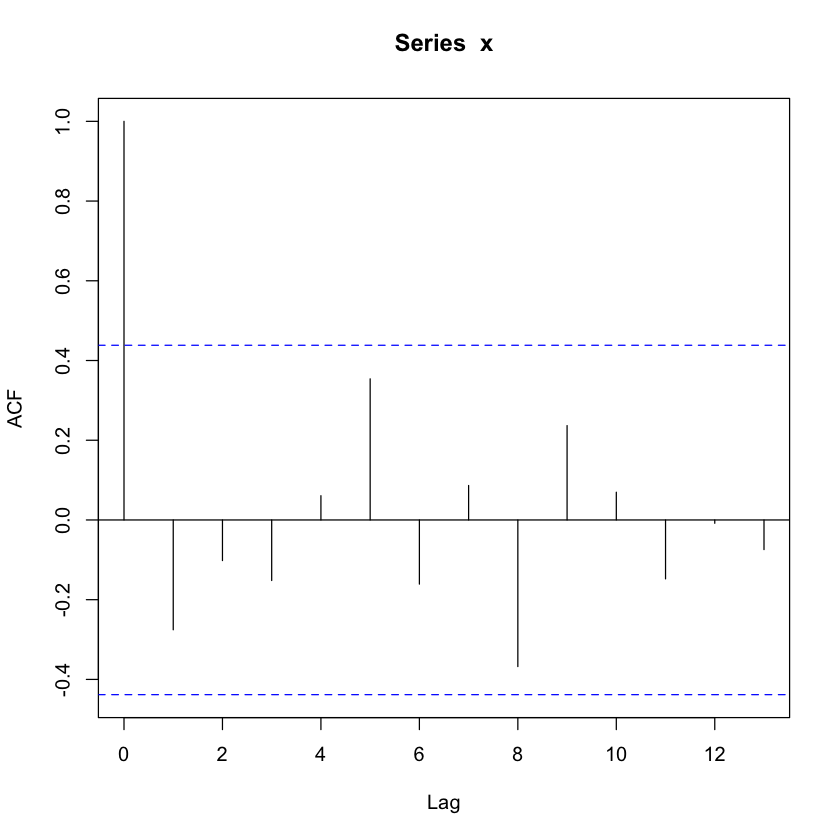

In [1]:
x = rnorm(20, 0, 1)
acf(x)

Suppose $X_1, X_2, \ldots, X_n$ are observations at times $t_1, t_2, \ldots t_n$, then the $k$ lag auto-correlation is given by 

\begin{equation}
r_k = \frac{\sum_{i=1}^{n-k} (X_i - \bar{X})(X_{i+k} - \bar{X})}{\sum_{i}^{N}(X_i - \bar{X})^2} 
\end{equation}

where, $\bar{X}$  is the average value of the observations.  Note that when $k = 0$, $r_k = 1$. 


# Basic Statistics

## Inequalities

These are two inequalites that can be used to approximate the probabilities. 

### Markov Inequality

If $X$ is a random variable that takes only *nonnegative values*, then for any $a > 0$
      \begin{equation*}
        P(X \geq a) \leq \frac{E(X)}{a}
      \end{equation*}


This is useful to find a bound on the probability when only  the mean of the distribution is known. 


#### Example 1

Suppose the number of e-mails received in a day is a random variable $X$ with mean 25. What is the probability that today the number of e-mails will exceed 30 (greater than or equal to 30)? 

By Markov inequality 
\begin{eqnarray*}
P(X \geq 30) & \leq & \frac{E(X)}{30} \\
          & \leq & \frac{25}{30} \\
          & \leq & \frac{5}{6}
\end{eqnarray*}

### Chebyshev's  Inequality

If $X$ is a random variable with finite mean $\mu$ and variance $\sigma^2$, then for any value $k >0$
      \begin{equation*}
        P(|X - \mu | \geq k) \leq \frac{\sigma^2}{k^2}
      \end{equation*}


This is useful to find a bound on the probability when only the mean an the variance of the distribiution is known. 

#### Example 1

If the variance $\sigma^2$ of the number of e-mails received is 10, what is the probability that today the number of e-mails received is between 20 and 30? 

By Chebyshev's  Inequality
\begin{eqnarray*} 
P(|X - 25| \geq 5) & \leq & \frac{\sigma^2}{5^2} \\
                   & \leq & \frac{10}{25} \\
                   & \leq & \frac{2}{5}
\end{eqnarray*}
Thus, $P(|X - 25| <  5) = 1 - P(|X - 25| \geq 5) \geq 1 - 2/5 \geq 3/5$


### Weak law of large numbers

Let $X_1 , X_2, \ldots$ be a sequence of independent and identically distributed random variables with finite mean $E(X_i) = \mu$. Then for any $\varepsilon > 0$,
      \begin{equation*}
        P \left( |\frac{X_1 + X_2 + \ldots + X_n }{n} - \mu | \geq \varepsilon \right) \rightarrow 0 ~~ \text{as} ~~ n \rightarrow \infty
      \end{equation*}


This result is true even if $X_i$'s  have finite mean but infinite variance and for the finite variance case follows from Chebyshev's  Inequality. 


## Sample Mean and Sample Variance

Population is the totality of observations. The size of the population is the number of observations. 

1. Example 1: Suppose 120 students in the class are classified according to their blood type. Population is the entire class. The size of the population is number of observations and in this case it is 120.

2. Example 2: Suppose all 18 year olds in Californi are classified according to their blood type. The population is all the 18 year olds in California. The size of the population is in the millions. 


Observations are values of a random variable $X$ with density function $f_X(x)$. Note  that in the case of Example 1 it is possible to observe the entire population whereas in case of Example 2 it is extremely difficult to observe the entire population. **The goal of statistical inference (estimation) is to infer (estimate)  characteristics (parameters) when we cannot observe the entire population.** 


Sample is a subset of the population. The goal is to obtain a  sample that is representative of the population. It is  important that sampling is done randomly without any bias. If the sampling is biased then inferences can underestimate or overestimate the characteristics of the population. 

Let $X_i, i = 1,2, \ldots, n$ be the random variable that represents the $i^{th}$ sample each having the same probability density function $f_X (x)$.  If $X_i$'s are random (independent) samples then 
\begin{equation}
f(x_1, x_2, \ldots, x_n) = f_X (x_1) f_X (x_2) \ldots f_X (x_n)
\end{equation}

**Sample Mean $\bar{X}$**
  \begin{equation*}
    \bar{X} = \frac{X_1 + X_2 + \ldots + X_n }{n}
  \end{equation*}
  
If $x_1, x_2, \ldots x_n$ are the sample values (i.e., the values assumed by the random variables $X_1, X_2, \ldots X_n$, respectively), $\bar{x} = \frac{\sum_{i=1}^n}{n}$ is the value assumed by the sample mean $\bar{X}$. 

#### Example 1

Suppose packet sizes (in bytes) of 5 randomly sampled packets are 64, 256, 238, 750, and 64. Then $\bar{x} = (64 + 256 + 238 + 750 + 64)/5 = 274.2$. 

**Sample variance $S^2$**
  \begin{equation*}
    S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2
  \end{equation*}


#### Example 2

Suppose we get sample inter-packet delays (IPDs) in microseconds  from 4 routers and they are 12, 15, 17, and 20 microseconds. Then we can easily calculate that 
$\bar{x} = (12+15+17+20)/4 = 16$ and hence 
\begin{eqnarray*}
s^2 &=& \frac{1}{3} \sum_{i=1}^{4}(x_i - 16)^2 \\
    &=& \frac{34}{3}
\end{eqnarray*}


Some notes: 

1. Sample Mean and Sample Variace are random variables. Every sample will give a different value of the sample mean and sample variance. 
2. For the sample variance we divide by $n-1$. This makes $S^2$ an unbiased estimator of $\sigma^2$. 


### More on why the sample variance $S^2$ is calculated by dividing by $n -1$ and not $n$? 

First note in computing the sample variance $S^2$  we finding the sum of square of the residuals between the sample and the sample mean.  Specifically, the residuals 
are $x_1 - \bar{x}, x_2 - \bar{x}, \ldots , x_n - \bar{x}$, where $x_i, i = 1, \ldots n $ are the $n$ samples and the value of the sample mean $\bar{x} = \frac{\sum_{i=1}^n x_i}{n}$. 

Note that while there are $n$ independent samples $x_i, i = 1, \ldots n $, there are only $n-1$ independent residuals since the sum the sum of the residuals is eqial to 0.  


### More formal definition

Sample mean $\bar{X}$ and Sample variance $S^2$ are random variables. They and any function of these are called statics. A statistic $\Theta$ is said to be an unbiased estimator of the parameter $\theta$ if
\begin{equation} 
E(\Theta) = \theta
\end{equation} 

For $S^2$ to be an unbiased estimator of population variance $\sigma^2$ it must be divided by $n - 1$.  In other words if we use $n$ im the denominator $E(S^2) \neq \sigma^2$. 

### Example - Eruption Duration

[1] 222


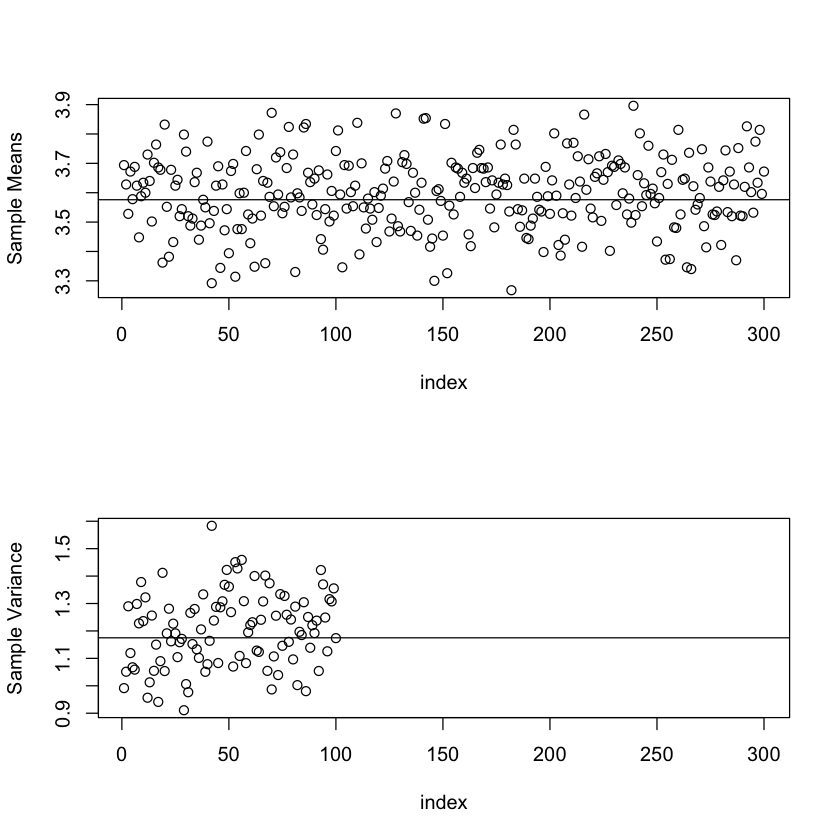

In [64]:
data = read.table(file="./Data/Old_Faithful.txt", header=TRUE)
par(mfrow=c(2,1))

eruption_duration = data[,3]
len = length(eruption_duration)
print(len)
number_of_samples = 300 # Number of experiments
sample_mean = numeric(0) 
sample_variance = numeric(0) 
sample_size = 50
for (i in 1:number_of_samples) {
    t = sample(eruption_duration, sample_size)
    sample_mean[i] = mean(t)
    sample_variance[i] = 0
    for (j in 1:sample_size) {
       sample_variance[i] = sample_variance[i] + (t[j] - sample_means[i])^2
        }
    sample_variance[i] = sample_variance[i]/(sample_size-1)
}
plot(sample_mean, xlab = "index", ylab = "Sample Means")
population_mean = mean(eruption_duration)
abline(h=population_mean)
plot(sample_variance, xlab = "index", ylab = "Sample Variance")
population_variance = var(eruption_duration)
abline(h=population_variance)
#print(sample_variance)

## Central Limit Theorem
Central limit theorem: Let $X_1 , X_2, \ldots X_n$ be a sequence of independent and identically distributed random variables with mean $\mu$ and variance $\sigma^2$. Then the distribution of Sample Mean $\bar{X}$ approaches  $N(\mu, \frac{\sigma^2}{n})$ when  $n$ is large. Thus

\begin{equation*}
\frac{X_1 + X_2 + \ldots + X_n}{n} \sim N(\mu, \frac{\sigma^2}{n})
 \end{equation*}
 when $n$ is large. 


Using transformation, we can show that
      \begin{equation*}
        \frac{X_1 + X_2 + \ldots + X_n  - n\mu}{\sigma \sqrt{n}}
      \end{equation*}
    tends to the standard Normal $Z \sim N(0,1)$ when  $n$ is large.


[1] 3.268
[1] 3.896


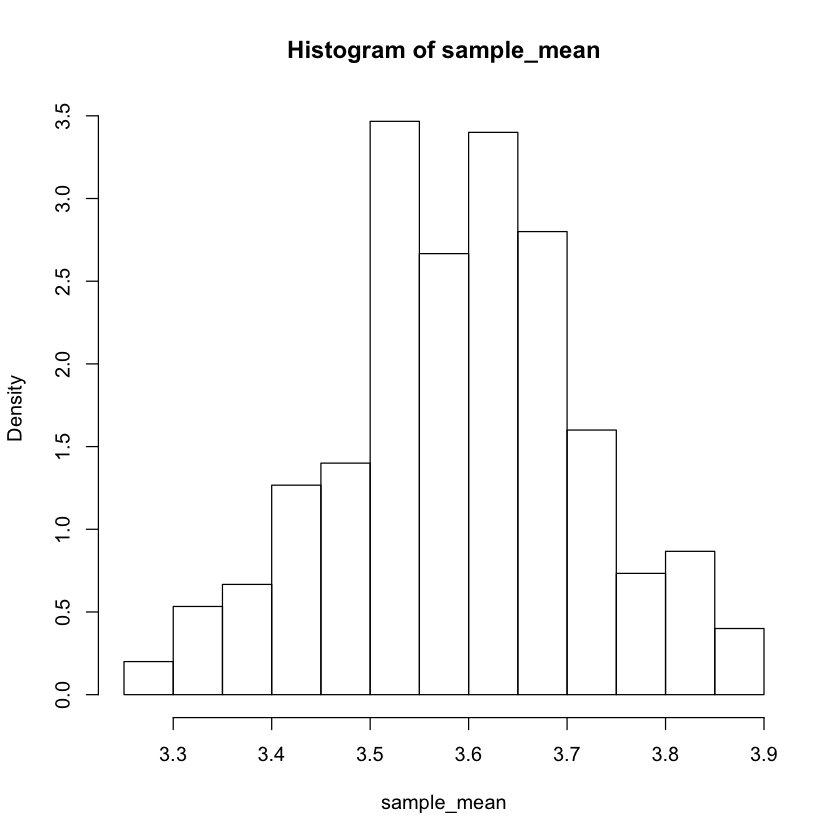

In [67]:
l = min(sample_mean)
print(l)
h = max(sample_mean)
print(h)
hist(sample_mean, breaks=seq(l,h+0.1,by=0.1), freq=F)

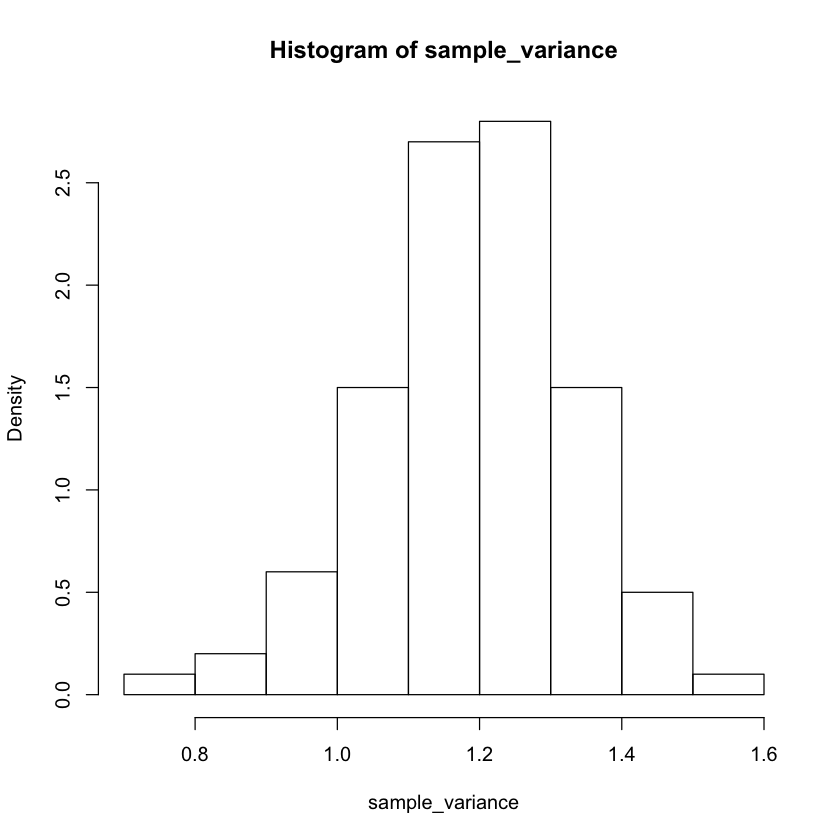

In [48]:
hist(sample_variance, freq=F)

#### Example 1
Suppose the number of accesses to a website by a randomly selected customer has a mean value 3.2 and standard deviation 2.4. Among 100 randomly slected customers, how likely is the sample mean of the number of times the website is accessed to exceed 4.0? 

##### Answer 

Let $X_i$ be the number of times the $i$th customer accesses the website.  The sample mean of the number of times the website is accessed by 100 customers is given by 
\begin{equation}
 \bar{X} = \frac{X_1 + X_2 + \ldots + X_{100}}{100}
\end{equation}
We need to find $P(\bar{X} > 4)$ which is given by 
\begin{eqnarray*}
 P(\bar{X} > 4) &=& P(\frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} > \frac{4 - \mu}{\frac{\sigma}{\sqrt{n}}}) \\
                &=& P(Z > \frac{4 - 3.2}{\frac{2.4}{\sqrt{100}}}) \\
                &=& 1 - \Phi(3.33) 
\end{eqnarray*}

#### Example 2

An astronomer is interested in measuring the distance, in light-years, from his observatory to a distant star. Although the astronomer
has a measuring technique, he knows that because of changing atmospheric conditions and normal error, each time a measurement is made, it will not yield the exact distance, but merely an estimate. As a result, the astronomer plans to make a series of measurements and then use the average value of these measurements as the  estimated value of the actual distance. If the astronomer believes that the value of the measurements are independent and identically distributed random variables having a common mean $d$ (the actual distance) and a common variance of 4, how many measurements should he make to be reasonably sure (say with 95\% probability) that his estimated distance is accurate to within 0.5 (postive and negative)  light-years?


##### Answer

Suppose that the astronomer decides to make $n$ observations. If $X_1, X_2, \ldots, X_n$ are the $n$ measurements, then, from the Central Limit Theorem, it follows that
\begin{equation*}
\frac{\sum_{i=1}^n X_i - nd}{\sigma \sqrt{n}} \sim N(0,1)
\end{equation*}
We want to find $P( -0.5 \leq  \frac{\sum_{i=1}^n X_i}{n} - d   \leq 0.5)$ which can rewritten as
\begin{eqnarray*}
\frac{\sum_{i=1}^n X_i - nd}{\sigma \sqrt{n}} \sim N(0,1) &=& P(-0.5\frac{\sqrt{n}}{2}  \leq Z \leq 0.5\frac{\sqrt{n}}{2}) \\
                                                                                               &=& \Phi(\frac{\sqrt{n}}{4}) - \Phi(- \frac{\sqrt{n}}{4}) \\
                                                                                               &=& 2 \Phi(\frac{\sqrt{n}}{4}) - 1 \\
\end{eqnarray*}
We want to find $n = n^*$ such that
\begin{eqnarray*}
          2 \Phi(\frac{\sqrt{n^*}}{4}) - 1   = 0.95 \\
          \Phi(\frac{\sqrt{n^*}}{4}) = 0.975
\end{eqnarray*}

We can now use the Standard Normal table  or qnorm to get  
\begin{equation*}
\frac{\sqrt{n^*}}{4} = 1.96
\end{equation*}
from which we get $n^* \approx 62$


In [70]:
1.99/2

[1] 0.995

In [2]:
qnorm(0.975, 0, 1)

[1] 1.959964

## Maximum Likelihood Estimation

Given a sample, that we know follows a specific distribution, how do we estimate the parameter of the distrution. More concretely, suppose we sample $n$ parts where each part can ne defective or good (non-defective). How do estimate probability of defective part for the population? 

Let $X_1, X_2, \ldots, X_n$ be independent random variables that are taken from a distribution with density fiunction $f_X(x; \theta)$ where $\theta$ is the parameter of the distribution. We define likelihood finction $L(x_1,x_2, \ldots, x_n; \theta)$ which is given by 
\begin{eqnarray*} 
L(x_1,x_2, \ldots x_n; \theta) &=& f(x_1, x_2, \ldots, x_n; \theta) \\
                               &=& f(x_1; \theta) f(x_2; \theta) \ldots f(x_n; \theta) 
\end{eqnarray*}
where $x_1, x_2, \ldots, x_n$ sample values, i.e., the observed values of $X_1, X_2, \ldots, X_n$. 

The maximum likelihood estimator of $\theta$ is the value of $\theta$  that results in the maximum value of the joint probability. 

### Example 1

3 items are selected  from a population with non-defective probability $p$. Suppose for the three samples we get ND, ND, D.  The likelihood function $L$ is given by 
\begin{eqnarray*}
L & = & p \times p \times q  \\
  & = & p^2 (1 - p) \\
  & = & p^2 - p^3
\end{eqnarray*}

We want to find $p$ that maximizes $L$. By differentiating $L$  with respect to $p$ and equating to 0 we can show that $p^* = 0.6666$ maximizes $L$. To show that it is indeed the maximum, take the second derivative and show that it is negative. 

In most cases it is easier to work with log of the likelihood function and we find the value of the parameter that maximizes the log likelihood function. This is shown in the example below. 

### Example 2 

Suppose 10 late stage cancer subjects   are injected with  a cancer drug that is designed to increase their survival rate. The survival times, in months, are 14, 17, 27, 18, 12, 8, 22, 13, 19, and 12. Assume that survival times are exponential distributed. Give a maximum likelihood estimate of the mean survival time.

#### Answer

We know that the probability density function for the exponential random variable X is given by
\begin{equation*}
% \nonumber to remove numbering (before each equation)
  f_X (x; \lambda) = {\lambda} e^{- {x}{\lambda}}     ~~~~ x > 0, \lambda > 0
\end{equation*}
where $\lambda$ is the rate and hence $\frac{1}{\lambda}$ is the mean survival  time. We define the likelihood function
\begin{eqnarray*}
  L(x_1, x_2, \ldots, x_n : \lambda) &=& f_X (x_1, x_2, \ldots x_n ; \lambda) \\
                                   &=& f_X (x_1 ; \lambda)f_X (x_2 ; \lambda) \ldots f_X (x_n ; \lambda) \\
                                   &=& {\lambda^n} e^{-\lambda (x_1 + x_2 + \ldots + x_n )}
\end{eqnarray*}
Now we take the log of the Likelihood function which gives us
\begin{eqnarray*}
  \ln(L(x_1, x_2, \ldots, x_n : \lambda)) &=& \ln({\lambda^n} e^{-\lambda (x_1 + x_2 + \ldots + x_n )})\\
                                         &=& n \ln \lambda  -  \lambda (x_1 + x_2 + \ldots + x_n )
\end{eqnarray*}
Now differentiating $\ln(L(x_1, x_2, \ldots, x_n : \lambda))$ with respect to $\lambda$ and setting it to 0 we obtain the following
\begin{eqnarray*}
  \frac{d\ln(L(x_1, x_2, \ldots, x_n : \lambda))}{d\lambda} &=& 0 \\
                                    n \frac{1}{\lambda} - (x_1 + x_2 + \ldots + x_n ) &=& 0 \\
                                    \lambda &=& \frac{n}{x_1 + x_2 + \ldots + x_n} \\
                                            &=& \frac{10}{14 + 17 + 27 + 18 + 12 + 8 + 22 + 13 + 19 + 12}\\
                                            &=& \frac{10}{162} \\
                                            &=& 0.0617284
\end{eqnarray*}

The mean survival time is $\frac{1}{\lambda}$ which is 16.2.


# Regression Analysis

## Model of Correlation 

We consider two random variable $X$ and $Z$. $X \sim N(0, \sigma_x)$ and $Z \sim N(0, \sigma_z)$ and they are independent. We define $Y = mX + Z$.

1. Perfect Correlation:} If $\sigma_z = 0$, $\sigma_x = 1$  we have perfect correlation. The following R code and Figure~\ref{figure:perfect-correlation}.

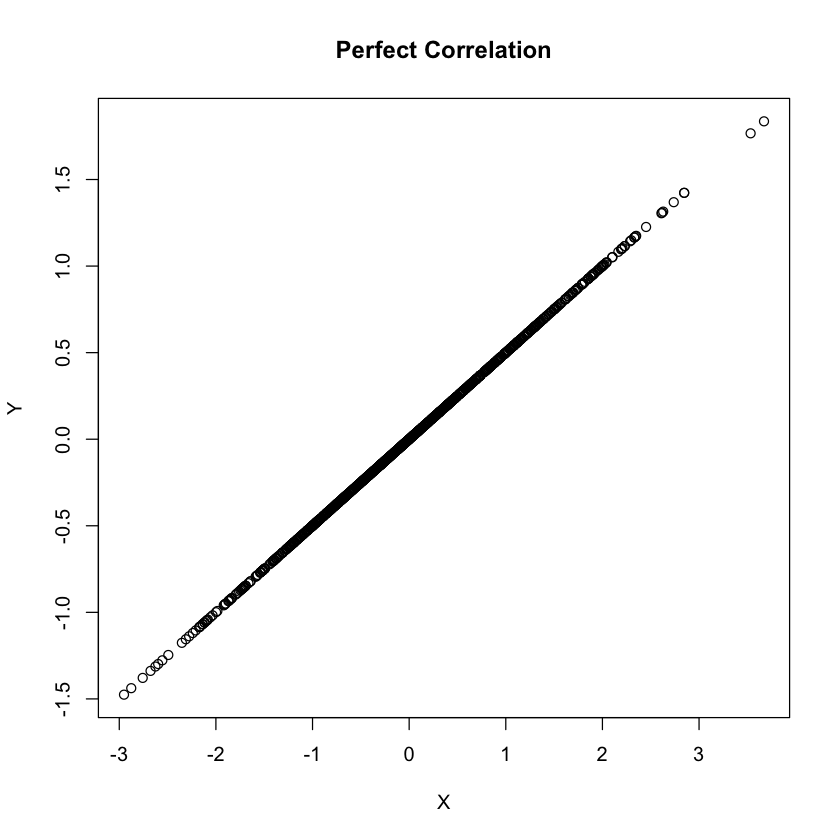

In [1]:
X = rnorm(1000, 0, 1)
Z = rnorm(1000, 0, 0)
Y = 0.5*X + Z
plot(X,Y, main="Perfect Correlation")

2. Some Correlation: In this case we set $\sigma_z > 0$. The following code is used to generate Figure~\ref{figure:some-correlation}  which show some correlation between $X$ and $Y$

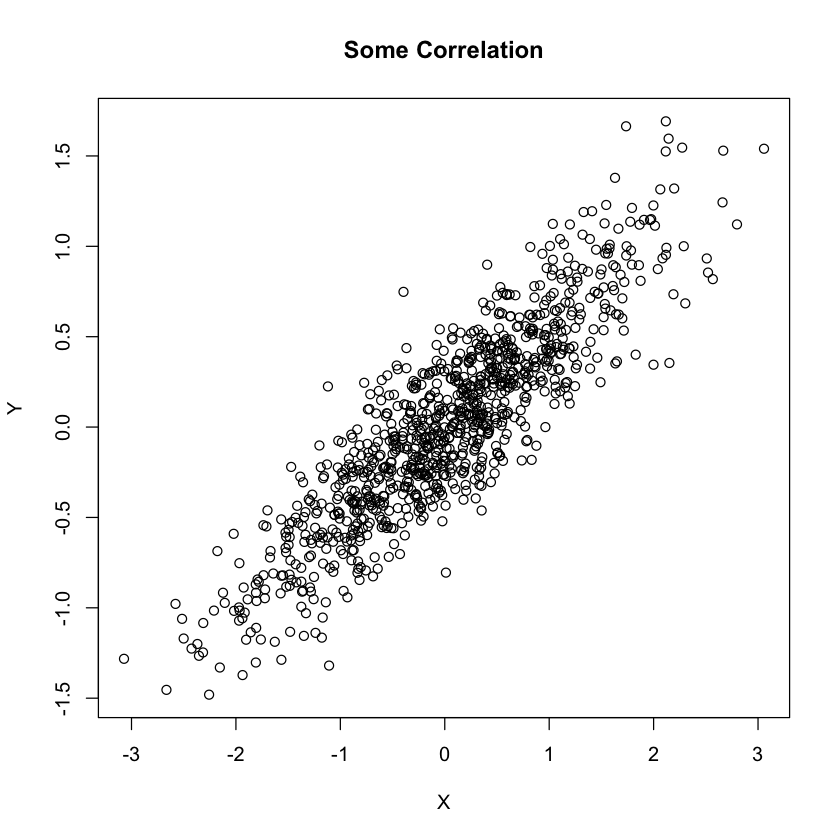

In [2]:
X = rnorm(1000, 0, 1)
Z = rnorm(1000, 0, 0.25)
Y = 0.5*X + Z
plot(X,Y, main="Some Correlation")

3. Zero Correlation: In this case we set $m=0$.

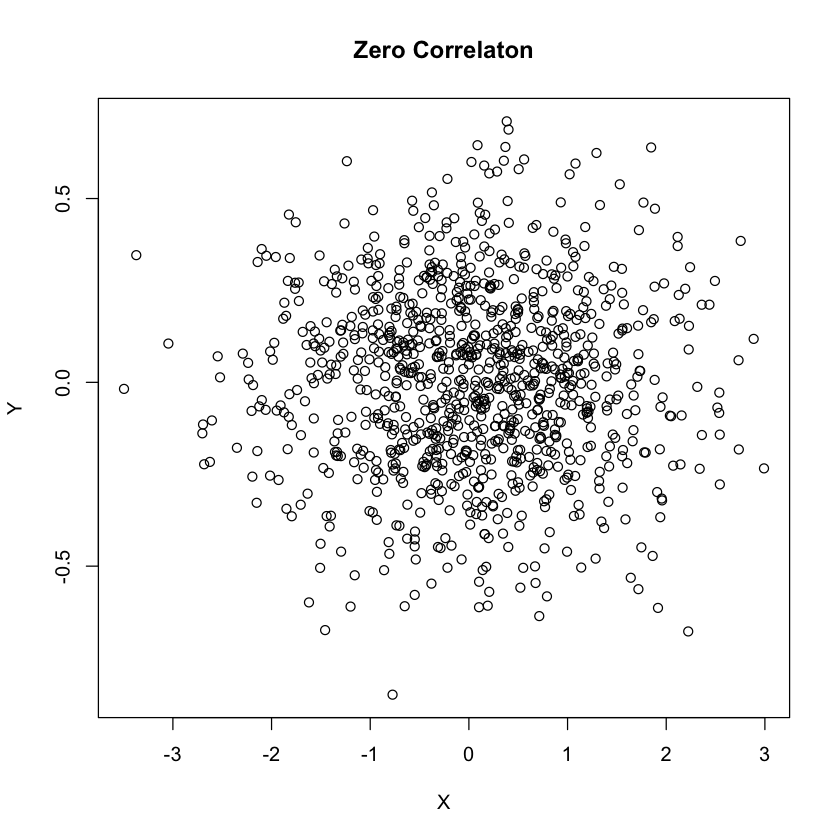

In [3]:
X = rnorm(1000, 0, 1)
Z = rnorm(1000, 0, 0.25)
Y = 0.0*X + Z
plot(X,Y, main="Zero Correlaton")

## Measure of Correlation

We define correlation coefficient $r$ as follows
\begin{eqnarray*}
  r &=& \frac{m \sigma_x}{\sigma_y}\\
    &=& \frac{m \sigma_x}{\sqrt{m^2 \sigma_x^2 + \sigma_z^2}} \\
\end{eqnarray*}

### Key Points

The following are some of the key points

1. The correlation coefficient $r$ measures the proportion of the standard deviation of $Y$ that is contributed by $mX$. If this proportion is large, then the correlation between $X$ and $Y$ will be large. In the extreme case when $\sigma_z = 0$, then this proportion $r = 1$ and $X$ and $Y$ are perfectly correlated. On the other hand if $m = 0$, then $X$ and $Y$ are not correlated and hence $r = 0$.

2. If $X$ is a random variable with variance $\sigma^2$, then $Var(aX) = a^2 \sigma^2$ where is some constant scaling factor. Also, if $X$ and $Y$ are independent random variable with variance $\sigma_x^2$ and $\sigma_y^2$, respectively, then $Var(aX + bY) =  a^2 \sigma_x^2 + b^2 \sigma_y^2$.

3. If $m < 0$ then $X$ and $Y$ will be negative correlated. The value of $-1 \leq r \leq 1$.



## Determining Correlation Coefficient Give a Set of Data Points 

In general we will be given a set of data points and we need to determine the correlation coefficient $r$.   This determined in terms of the covariance.

### Covariance 

The covariance of two random variables $X$ and $Y$ is defined as 

\begin{equation*}
  Cov(X,Y) = E((X - \mu_x)(Y - \mu_y))
\end{equation*}

where $\mu_x$ and $\mu_y$ are the mean of $X$ and $Y$.  If $X = Y$, then $Cov(X,Y) = Var(X)$. Furthermore, if $\mu_x = \mu_y = 0$, then $Cov(X,Y) = E(XY)$.  Using the covariance, the correlation coefficient can be defined as

\begin{eqnarray*}
  r &=& \frac{Cov(X,Y)}{\sigma_x \sigma_y} \\
    &=& \frac{E((X - \mu_x)(Y - \mu_y))}{\sigma_x \sigma_y} \\
\end{eqnarray*}

It is easy to show that the two definitions of $r$ are the same, i.e., if $Y = mX + Z$, then

\begin{eqnarray*}
  r &=& \frac{Cov(X,Y)}{\sigma_x \sigma_y} \\
    &=& \frac{m \sigma_x}{\sigma_y} \\
\end{eqnarray*}

The advantage of the definition based on $Cov(X,Y)$ is that we donot need to know $m$. In most cases we are given a set of $n$ data points $(x_i, y_i)$ and we are required to find the correlation.  If we know the distribution of $X$ and $Y$ and hence $\sigma_x$ and $\sigma_y$, we can see effect of changing $r$.  This is shown in Figure~\ref{figure:plot-with-different-values-of-r}  which is drawn using the the following R code.  Notice how $m$ and $\sigma_z$ are derived  from the given values of $r$, $\sigma_x$ and $\sigma_y$. You should be able to derive those relationships from the two definitions of $r$.



### Plots with different r values

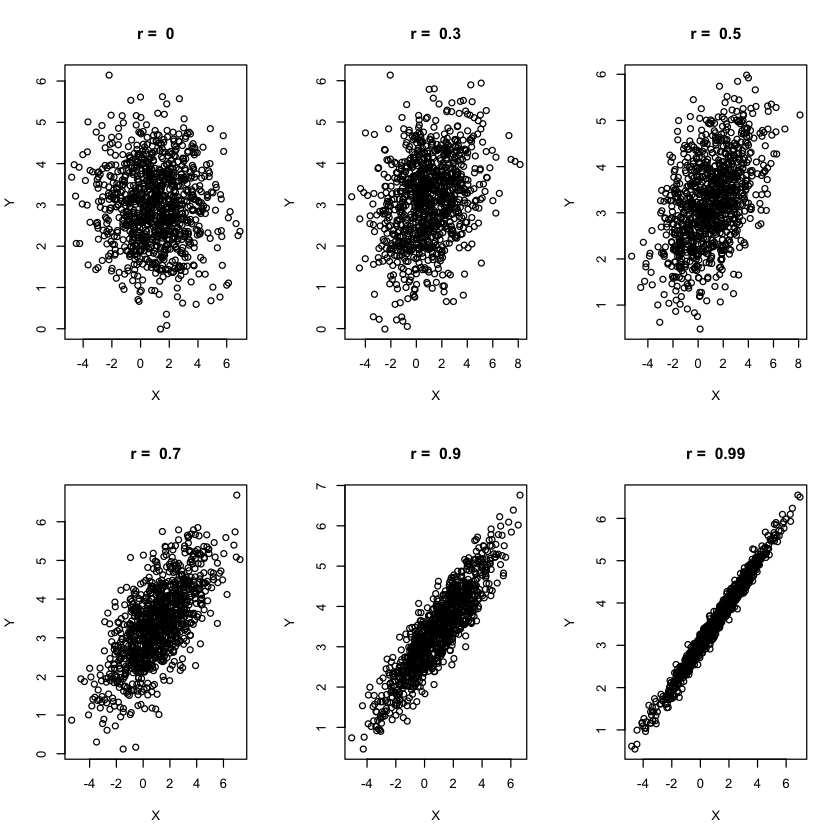

In [4]:
sigmax = 2
sigmay = 1
n = 1000
par(mfrow=c(2,3))
rvalues = c(0, 0.3, 0.5, 0.7, 0.9, 0.99)
for (r in rvalues){

  sigmaz = sigmay *  sqrt(1 - r**2)
  m = r * sigmay/sigmax
  X = rnorm(n,1,sigmax)
  Z = rnorm(n,3,sigmaz)
  Y = m*X + Z
  plot(X,Y, main = paste("r = ", r))
}

## Correlation Coefficient Given Sampled Data
If we are given $n$ sampled data points $(x_i,y_i)$, the covariance is defined as

\begin{equation*}
  Cov(X,Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
\end{equation*}

where $\bar{x}$ and $\bar{y}$ are the sample means of the samples $x_i$ and $y_i$.

Furthermore, we can calculate the sample variance using

\begin{equation*}
  s_x^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
\end{equation*}

and

\begin{equation*}
  s_x^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2
\end{equation*}

Using the above we can now define $r$ as
\begin{equation*}
  r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
\end{equation*}

###  Notes

Couple of notes

1. $s_x$ and $s_y$ and not unbiased estimators of the standard deviations of $X$ and $Y$ and neither is the $Cov(X,Y)$.

2. If we used unbiased estimator, then it should be divided by $n-1$. However, the final equation for $r$ will remain the same.

3. Given a set of data points the following are the steps to find the correlation coefficient $r$.  a) Find $\bar{x}$ and $\bar{y}$. b) Find $s_x$ and $s_y$. c) Find $Cov(X, Y)$. d) Find $r = \frac{Cov(X, Y)}{s_x s_y}$. e) Find $m = r \frac{s_y}{s_x}$

## The best-fit line
Give a set of points we want to draw the "best-fit" line. We define the best fit line to be the one that minimizes the sum of the squares of the vertical distances between the line and the points.  Suppose the line is give by $Y = Ax + B$ and we are given $n$ data points $(x_i,y_i)$. Then $S$, the sum of the squares of the vertical distances between the line and the points is given by

\begin{equation*}
  S = \sum_{i=1}^{n} (y_i - (Ax_i + B))^2
\end{equation*}
If we expand this and find $A$ and $B$ that minimizes $S$, we can show that $A = r \frac{s_y}{s_x}$.


## R Functions

1. cor :  computes the  correlation of x and y if these are vectors

2. cov :  computes the  covariance of x and y if these are vectors

3. lm  :  used to fit linear models

### Example

*** About the data set:***  These are the ages (years) and the logarithmically transformed admission serum urea (natural logarithm [ln] urea) for 20 patients attending an accident and emergency unit (A\&E).



[1] 0.6201371


Call:
lm(formula = lnurea ~ age)

Coefficients:
(Intercept)          age  
    0.71470      0.01716  


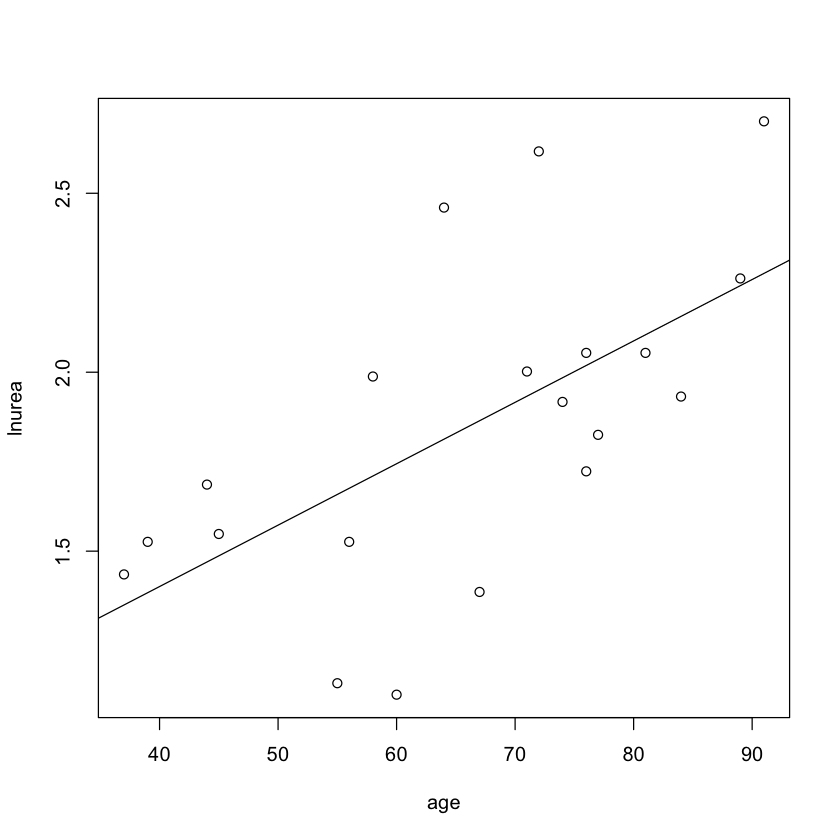

In [5]:
data = read.table(file="./Data/urea-serum-data.txt", header=TRUE)
age = data[,2]
lnurea = data[,3]
plot(age, lnurea)
cor(age,lnurea)
lm(lnurea ~ age)
abline(coef=c(0.7147, 0.01716))

### Example 2

This example shows how to calculate $r$ from a data set using the steps that we had discussed in class. We also calculate $m$. We then use $lm$ to find the best fit line  adn show that thw slope of the best fit line is the same as $m$. 

1. Create a data file with teh data 

2. When you call lm, note that order. In  $lm(y \sim x)$, $y$ is the dependent variable or target (house price) and $x$ is the independent variable or regressor (size of house in square foot). $lm(x \sim y)$ is different. 

[1] 0.7578205
[1] 1.077826
       x 
1.077826 


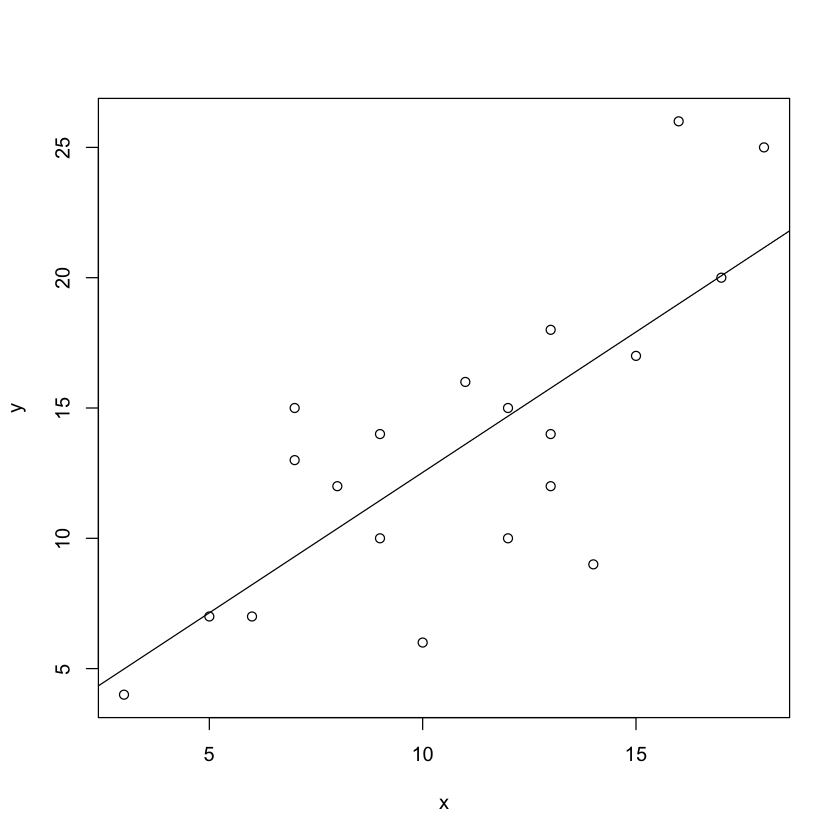

In [7]:
data = read.table(file="./Data/lm_synthetic_data.txt", sep=",", header = FALSE)
x = data[,1]
y = data[,2]
barx = sum(x)/length(x)
bary = sum(y)/length(y)
sx = sqrt(sum((x - barx)*(x - barx))/(length(x) - 1))
sy = sqrt(sum((y - bary)*(y - bary))/(length(y) - 1))
covxy = sum((x - barx)*(y - bary))/(length(y) - 1)
r = covxy/(sx*sy)
print(r)
m = r * sy/sx
print(m)
plot(x,y)
lm_summary = lm(y ~ x)
intercept = coef(lm_summary)[1]
slope = coef(lm_summary)[2]
print(slope)
abline(coef=c(intercept, slope))


# Discussion Section (12/10)

## Problem 1 

A non-repeat word is a sequence of at least one (and possibly all) of the usual 26 letters a,b,c,. . . ,z, with repetitions not allowed. For example, “course” is a non-epeatword, but “statistics” is not. Order matters, e.g., “course” is not the same as
“source”. A non-repeat word is chosen randomly, with all non-repeat words equally likely. What is the probability that it uses all 26 letters.


### Answer

The number of non-repeat words having all 26 letters is the number of ordered arrangements of 26 letters which is  26!. 

To construct a non-repeat word with $ k \leq 26$ letters, we first select k letters from the alphabet which is $\binom{26}{k}$ selections) and then arrange them into
a word (k! arrangements). Hence there are $\binom{26}{k} k! $  non-repeat words with k letters, with
$k$ ranging from 1 to 26. Thus the total number of non-repeat words is given by '
\begin{equation}
 \text{Total number of nonepeatwords} = \sum_{k=1}^{26} \binom{26}{k} k! 
\end{equation}

Thus the requires probability $P$  of a norepeat word with 26 letters is 
\begin{equation}
 P = \frac{26!}{\sum_{k=1}^{26} \binom{26}{k} k!}
\end{equation}
     

## Problem 2
Suppose the network flow size is a normal random variable with parameter $\mu = 71$ GBytes and $\sigma = 2.5$ GBytes. What percentage of the flows are greater than 72 GBytes? Suppose flows that are greater than 72 GBytes are clssified as large flows. What percentage of the large flows are greater than  77 GBytes?

### Answer
Let $X$ be a random variable that  denotes the network flow size. $X \sim N(71, 2.5)$. First, we want to find $P(X > 72)$ which is $1 - P(X \leq 72)$.
\begin{eqnarray*}
 P(X \leq 72) &=& P(\frac{X - 71}{2.5} \leq \frac{72-71}{2.5}) \\
              &=& \Phi(0.4) \\
              &=& 0.6554
\end{eqnarray*}
Thus the required probability is $1 - 0.6554 = 0.3446$.

For the second part we want to find  the probability that the flow size is greater than 77 GBytes  given that it is a large flow.
\begin{eqnarray*}
 P(X > 77 | X > 72) &=& \frac{P(X > 77 \cap X > 72)}{P(X > 72)} \\
              &=&  \frac{P(X > 77)}{P(X > 72)}  \\
              &=&  \frac{1 - P(X \leq 77)}{P(X > 72)} \\
              &=&  \frac{1 - \Phi(2.4)}{0.3446} \\
              &=& \frac{1- 0.9918}{0.3446} \\
              &=& 0.024
\end{eqnarray*}


In [4]:
pnorm(72, 71, 2.5)

[1] 0.6554217

## Problem 3

Suppose that a detection test for a particular  malware  in code is to be applied to all the executable codes in a system. The goal is to detect the malware quickly so that it can be removed before it spread to other code blocks. We will adopt the following convention. The test is positive ($T=1$) if malware is detected. If malware is present in the code then $D=1$.  The test has a  sensitivity of 98\% and a specificity of 96\%. Suppose that the prevalence of the malware is 0.5\%.

  1. What proportion of those executable codes that test positive will actually have the malware?
 
  
  2. All of the executable codes that test positive will be subjected to more expensive, time consuming diagnostic procedures to determine whether or not they actually have the malware. What percentage of the executable codes  will be subjected to these procedures?
  
  3. The entire population of executable codes  can be viewed as having been split into four groups: true and false positive, true and false negative. What proportion of the entire population falls into the false postive category?

### Answer


  1. We need to find $P(D=1|T=1)$.

   \begin{eqnarray*}
    P(D=1|T=1) &=& \frac{P(D=1 \cap T=1)}{P(T=1)} \\
               &=& \frac{P(T=1|D=1)P(D=1)}{P(T=1)} \\
               &=& \frac{P(T=1|D=1)P(D=1)}{\underbrace{P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0)}_{\text{Using the law of total probability}}} \\
               &=& \frac{0.98*0.005}{0.98*0.005 + (1-0.96)*0.995}\\
               &=& 0.1096197
  \end{eqnarray*}

The denominator is using the Law of Total probability
  
  2. For this part we need to find $P(T=1)$. This is the same as the denominator

\begin{eqnarray*}
    P(T=1) &=& P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0) \\
           &=& 0.98*0.005 + (1-0.96)*0.995 \\
           &=& 0.0447
  \end{eqnarray*}
  
  3. The following are the four groups
  \begin{eqnarray*}
    \text{True Positive} &=& P(D=1 \cap T=1) \\
                         &=& P(T=1 | D=1) \times P(D=1) \\
                         &=& \eta \times \pi \\
                         &=& 0.98 \times 0.005
  \end{eqnarray*}
  
  \begin{eqnarray*}
    \text{True Negative} &=& P(D=0 \cap T=0) \\
                         &=& P(T=0 | D=0) \times P(D=0) \\
                         &=& (\theta) \times (1 - \pi) \\
                         &=& (0.96) \times (1 - 0.995)
  \end{eqnarray*}

  \begin{eqnarray*}
      \text{False Negative} &=& P(D=1 \cap T=0) \\
                         &=& P(T=0 | D=1) \times P(D=1) \\
                         &=& (1 - \eta) \times \pi \\
                         &=& (1 - 0.98) \times 0.005
   \end{eqnarray*}

   \begin{eqnarray*}
    \text{False Positive} &=& P(D=0 \cap T=1) \\
                         &=& P(T=1 | D=0) \times P(D=0) \\
                         &=& (1 - \theta) \times (1-\pi) \\
                         &=& (1 - 0.96) \times 0.995
   \end{eqnarray*}


## Problem
 
A computer has  three different storage subsystems, numbered 1 (cache), 2 (memory), and 3 (disk). When a  process runs it  may access all three storage subsystems. The probability that the next access to storage has a destination in a particular storage subsystem  depends on where the current access is destined to. Specifically, whenever the process has a request to storage subsystem 1, the probability that the 
next request  is going to storage subsystem 1 is .3, to  storage subsystem 2 is .2, and to storage subsystem 3 is .5.  If the current request is to storage subsystem 2, the probability that the next request  is going to 1 is .1, to  2 is .8, and
to  3 is .1. Finally, whenever the request is to 3, the probability that the next request 
 is going to 1 is .4, to 2 is .4, and to  3 is .2.
 
  1. Write the one-step transition probability matrix 
  
  2. If the $i$th request is satisfied by storage subsystem 1, what is the probability that $i+2$th request will be for storage subsystem 3. 
  
  3. What is the long-run probability of access to storage sub-system 2? 



### Answer 

\begin{equation*}
  P = \left[ \begin{array}{lll}
        0.3 & 0.2 & 0.5 \\
        0.1 & 0.8 & 0.1 \\
        0.4 & 0.4 & 0.2 \\
       \end{array} \right]
\end{equation*}


In [9]:
P = matrix(c(0.3,0.2,0.5, 0.1, 0.8, 0.1, 0.4, 0.4, 0.2), nrow=3, ncol=3, byrow=TRUE, dimnames=list(c(1,2,3), c(1,2,3)))
P

1,2,3
0.3,0.2,0.5
0.1,0.8,0.1
0.4,0.4,0.2


In [10]:
P2 = P%*%P
P2

1,2,3
0.31,0.42,0.27
0.15,0.70,0.15
0.24,0.48,0.28


In [14]:
P4 = P2%*%P2
P4

1,2,3
0.2239,0.5538,0.2223
0.1875,0.6250,0.1875
0.2136,0.5712,0.2152


In [15]:
P8 = P4%*%P4
P8

1,2,3
0.2014520,0.5970986,0.2014494
0.1992188,0.6015625,0.1992188
0.2008918,0.5982139,0.2008943
